In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [104]:
aep = pd.read_csv('./data/AEP_hourly.csv')
comed = pd.read_csv('./data/COMED_hourly.csv')
dayton = pd.read_csv('./data/DAYTON_hourly.csv')
deok = pd.read_csv('./data/DEOK_hourly.csv')
dom = pd.read_csv('./data/DOM_hourly.csv')
duq = pd.read_csv('./data/DUQ_hourly.csv')
ekpc = pd.read_csv('./data/EKPC_hourly.csv')
fe = pd.read_csv('./data/FE_hourly.csv')
ni = pd.read_csv('./data/NI_hourly.csv')
pjm = pd.read_csv('./data/PJM_Load_hourly.csv')
pjme = pd.read_csv('./data/PJME_hourly.csv')
pjmw = pd.read_csv('./data/PJMW_hourly.csv')

In [105]:
datasets = [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw]

In [106]:
for i, df in enumerate(datasets):
    df.columns = ['Datetime', 'MW']

combined = pd.concat(datasets, ignore_index=True)

In [107]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090167 entries, 0 to 1090166
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Datetime  1090167 non-null  object 
 1   MW        1090167 non-null  float64
dtypes: float64(1), object(1)
memory usage: 16.6+ MB


In [108]:
combined.head()

,Datetime,MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [109]:
combined['Datetime'] = pd.to_datetime(combined['Datetime'])

combined['Year'] = combined['Datetime'].dt.year
combined['Month'] = combined['Datetime'].dt.month
combined['Day'] = combined['Datetime'].dt.day
combined['Hour'] = combined['Datetime'].dt.hour
combined['DayOfWeek'] = combined['Datetime'].dt.dayofweek
combined['IsWeekend'] = combined['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [110]:
combined.head()

,Datetime,MW,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,2004-12-31 01:00:00,13478.0,2004,12,31,1,4,0
1,2004-12-31 02:00:00,12865.0,2004,12,31,2,4,0
2,2004-12-31 03:00:00,12577.0,2004,12,31,3,4,0
3,2004-12-31 04:00:00,12517.0,2004,12,31,4,4,0
4,2004-12-31 05:00:00,12670.0,2004,12,31,5,4,0


In [111]:
print(combined.isnull().sum())

Datetime     0
MW           0
Year         0
Month        0
Day          0
Hour         0
DayOfWeek    0
IsWeekend    0
dtype: int64


In [112]:
print(combined.dtypes)

Datetime     datetime64[ns]
MW                  float64
Year                  int32
Month                 int32
Day                   int32
Hour                  int32
DayOfWeek             int32
IsWeekend             int64
dtype: object


In [113]:
print(combined['Year'].unique())
print(combined['Month'].unique())
print(combined['DayOfWeek'].unique())
print(combined['IsWeekend'].unique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 1998 1999 2000 2001 2002 2003]
[12  1 11 10  9  8  7  6  5  4  3  2]
[4 5 3 2 1 0 6]
[0 1]


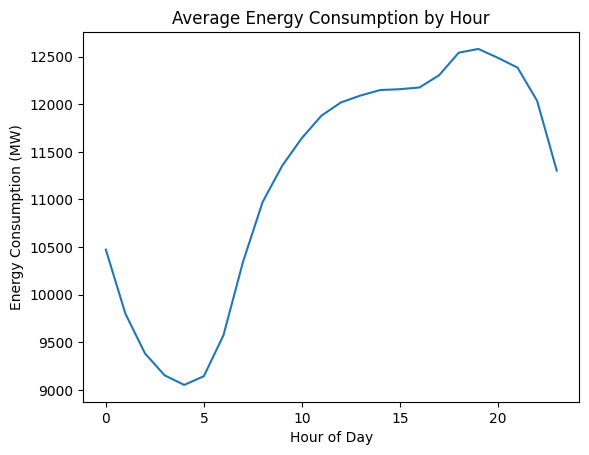

In [114]:
hourly_avg = combined.groupby('Hour')['MW'].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption (MW)')
plt.show()

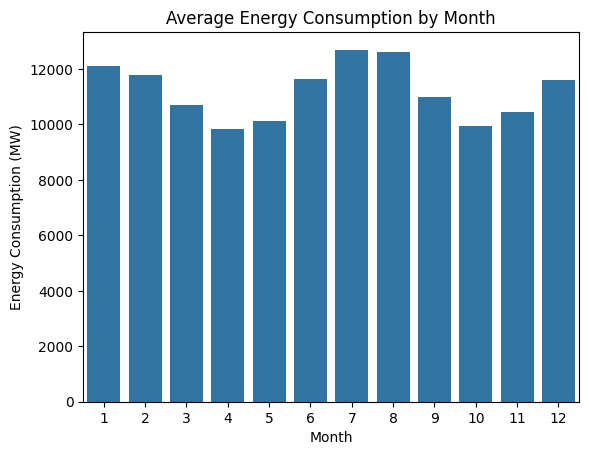

In [115]:
monthly_avg = combined.groupby('Month')['MW'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MW)')
plt.show()

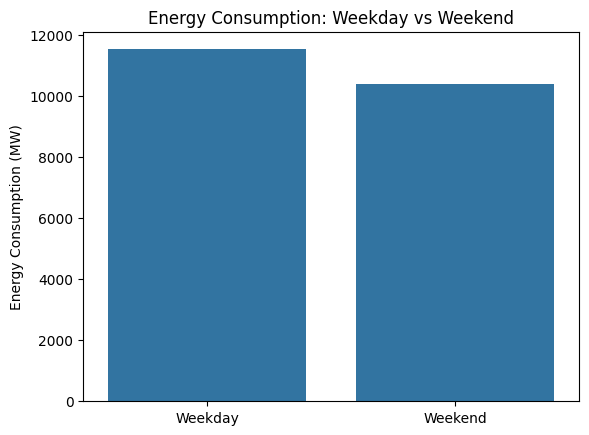

In [116]:
weekend_avg = combined.groupby('IsWeekend')['MW'].mean()
sns.barplot(x=['Weekday', 'Weekend'], y=weekend_avg.values)
plt.title('Energy Consumption: Weekday vs Weekend')
plt.ylabel('Energy Consumption (MW)')
plt.show()

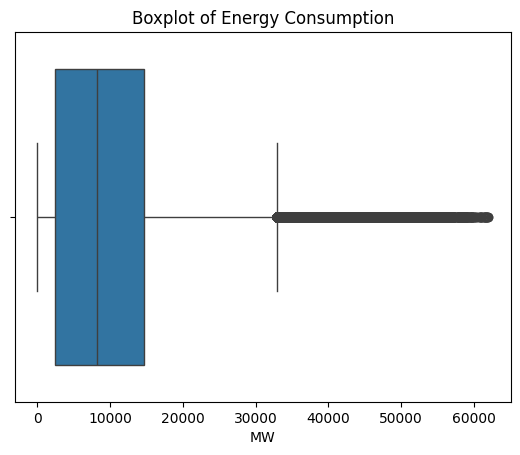

In [117]:
sns.boxplot(x=combined['MW'])
plt.title('Boxplot of Energy Consumption')
plt.show()

In [118]:
daily_data = combined.resample('D', on='Datetime').mean()

result = adfuller(daily_data['MW'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.3131867156958577
p-value: 0.16775025782371839


In [ ]:
combined['Datetime'] = pd.to_datetime(combined['Datetime'])
combined.set_index('Datetime', inplace=True)
daily_data = combined['MW'].resample('D').mean()

daily_diff = daily_data.diff().dropna()

# ADF test
result = adfuller(daily_diff)
print(f'ADF Statistic (Daily Differenced): {result[0]}')
print(f'p-value (Daily Differenced): {result[1]}')

ADF Statistic (Daily Differenced): -14.601496064771506
p-value (Daily Differenced): 4.1589084883114875e-27


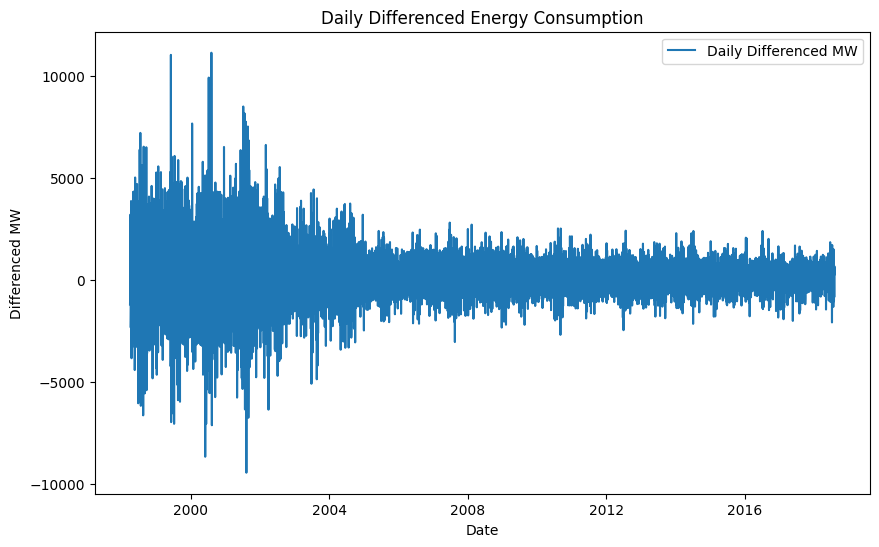

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daily_diff, label='Daily Differenced MW')
plt.title('Daily Differenced Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Differenced MW')
plt.legend()
plt.show()

In [121]:
combined.reset_index(inplace=True)
combined.head()

,Datetime,MW,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,2004-12-31 01:00:00,13478.0,2004,12,31,1,4,0
1,2004-12-31 02:00:00,12865.0,2004,12,31,2,4,0
2,2004-12-31 03:00:00,12577.0,2004,12,31,3,4,0
3,2004-12-31 04:00:00,12517.0,2004,12,31,4,4,0
4,2004-12-31 05:00:00,12670.0,2004,12,31,5,4,0


In [ ]:
# lag features
combined['MW_Lag_1'] = combined['MW'].shift(1)      # Previous hour
combined['MW_Lag_24'] = combined['MW'].shift(24)    # Same hour previous day
combined['MW_Lag_168'] = combined['MW'].shift(168)  # Same hour previous week

combined.dropna(inplace=True)

combined[['Datetime', 'MW', 'MW_Lag_1', 'MW_Lag_24', 'MW_Lag_168']].head()

,Datetime,MW,MW_Lag_1,MW_Lag_24,MW_Lag_168
168,2004-12-24 01:00:00,15645.0,15676.0,16669.0,13478.0
169,2004-12-24 02:00:00,15265.0,15645.0,16218.0,12865.0
170,2004-12-24 03:00:00,15138.0,15265.0,16135.0,12577.0
171,2004-12-24 04:00:00,15068.0,15138.0,16107.0,12517.0
172,2004-12-24 05:00:00,15122.0,15068.0,16229.0,12670.0


In [123]:
combined.drop(['Datetime'], axis=1, inplace=True)
combined.head()

,MW,Year,Month,Day,Hour,DayOfWeek,IsWeekend,MW_Lag_1,MW_Lag_24,MW_Lag_168
168,15645.0,2004,12,24,1,4,0,15676.0,16669.0,13478.0
169,15265.0,2004,12,24,2,4,0,15645.0,16218.0,12865.0
170,15138.0,2004,12,24,3,4,0,15265.0,16135.0,12577.0
171,15068.0,2004,12,24,4,4,0,15138.0,16107.0,12517.0
172,15122.0,2004,12,24,5,4,0,15068.0,16229.0,12670.0


In [124]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089999 entries, 168 to 1090166
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MW          1089999 non-null  float64
 1   Year        1089999 non-null  int32  
 2   Month       1089999 non-null  int32  
 3   Day         1089999 non-null  int32  
 4   Hour        1089999 non-null  int32  
 5   DayOfWeek   1089999 non-null  int32  
 6   IsWeekend   1089999 non-null  int64  
 7   MW_Lag_1    1089999 non-null  float64
 8   MW_Lag_24   1089999 non-null  float64
 9   MW_Lag_168  1089999 non-null  float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 70.7 MB


In [125]:
combined.to_csv('./data/dataset.csv', index=False)